In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t',quoting=3)


In [3]:
unique_values=df.iloc[:,0].unique()

In [4]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [5]:
pd.DataFrame(X).head(10)

,0
0,Wow... Loved this place.
1,Crust is not good.
2,Not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...
4,The selection on the menu was great and so wer...
5,Now I am getting angry and I want my damn pho.
6,Honeslty it didn't taste THAT fresh.)
7,The potatoes were like rubber and you could te...
8,The fries were great too.
9,A great touch.


In [6]:
import re
import nltk 

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [9]:
class Cleaning:
    def __init__(self, data):
        self.data = data
        
    
    def create_corpus(self,data=None):
        if data is not None:
            self.data=data
        stop=stopwords.words('english')
        stop.remove('not')
        corpus = []
        ps = PorterStemmer()
        for review in self.data:
            review = re.sub('[^a-zA-Z]', ' ', review[0])
            review = review.lower()
            review = review.split()
            review = [ps.stem(word) for word in review if word not in set(stop)]
            corpus.append([' '.join(review)])
        return corpus


In [10]:
clean=Cleaning(X)
corpus=clean.create_corpus()

In [11]:
corpus

[['wow love place'],
 ['crust not good'],
 ['not tasti textur nasti'],
 ['stop late may bank holiday rick steve recommend love'],
 ['select menu great price'],
 ['get angri want damn pho'],
 ['honeslti tast fresh'],
 ['potato like rubber could tell made ahead time kept warmer'],
 ['fri great'],
 ['great touch'],
 ['servic prompt'],
 ['would not go back'],
 ['cashier care ever say still end wayyy overpr'],
 ['tri cape cod ravoli chicken cranberri mmmm'],
 ['disgust pretti sure human hair'],
 ['shock sign indic cash'],
 ['highli recommend'],
 ['waitress littl slow servic'],
 ['place not worth time let alon vega'],
 ['not like'],
 ['burritto blah'],
 ['food amaz'],
 ['servic also cute'],
 ['could care less interior beauti'],
 ['perform'],
 ['right red velvet cake ohhh stuff good'],
 ['never brought salad ask'],
 ['hole wall great mexican street taco friendli staff'],
 ['took hour get food tabl restaur food luke warm sever run around like total overwhelm'],
 ['worst salmon sashimi'],
 ['al

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
class BOW:
    def __init__(self,data):
        self.data=data
        self.cv=CountVectorizer(max_features=1500)
    def create(self):
        data=[i[0] for i in self.data]
        X=self.cv.fit_transform(data)
        return X

    def create_single(self,data):
        return self.cv.transform(data[0])
        
        

In [13]:
bow=BOW(corpus)
X=bow.create()

In [14]:
X[1]

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 1500)>

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size=0.8,random_state=39)


In [16]:
y_test.shape

(200,)

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

class Models:
    def __init__(self, X, y, X_test=None, y_test=None):
        self.X = X
        self.y = y
        self.X_test = X_test
        self.y_test = y_test
        self.models = {
            'GNB': GaussianNB(),
            'DTC': DecisionTreeClassifier(),
            'RFC': RandomForestClassifier(),
            'LOR': LogisticRegression(max_iter=1000),
            'KNN': KNeighborsClassifier()
        }

    def train(self):
        for model in self.models.keys():
            self.models[model] = self.models[model].fit(self.X, self.y)
        self.check_and_print()
        return self.models

    def check_and_print(self):
        # Use test set if provided, else training set
        X = self.X_test if self.X_test is not None else self.X
        y = self.y_test if self.y_test is not None else self.y

        for model in self.models.keys():
            print(model, end=' --- ')
            p = self.models[model].predict(X)
            print(f'Accuracy : {accuracy_score(y, p):.3f}', end=' --- ')
            print(f'Precision : {precision_score(y, p, average="macro"):.2f}', end=' --- ')
            print(f'Recall : {recall_score(y, p, average="macro")}')

In [18]:
model=Models(X_train.toarray(),y_train,X_test.toarray(),y_test)

In [19]:
models=model.train()

GNB --- Accuracy : 0.710 --- Precision : 0.73 --- Recall : 0.705234711240116
DTC --- Accuracy : 0.805 --- Precision : 0.82 --- Recall : 0.8076769092182965
RFC --- Accuracy : 0.805 --- Precision : 0.83 --- Recall : 0.8091782604343909
LOR --- Accuracy : 0.795 --- Precision : 0.80 --- Recall : 0.7952657391652487
KNN --- Accuracy : 0.705 --- Precision : 0.73 --- Recall : 0.7096887198478631


In [20]:
def predict(sentence):
    sentence=[[sentence]]
    sentence=clean.create_corpus(sentence)
    sentence=bow.create_single(sentence)
    return 'Good' if models['RFC'].predict(sentence.toarray()) or models['DTC'].predict(sentence.toarray()) or models['LOR'].predict(sentence.toarray()) else 'Bad'

In [34]:
path=r"C:\Users\ayush\OneDrive\Desktop\5.jpg"
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext(path)
text = " ".join([res[1] for res in result])
print('The review is :',predict(text))

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


The review is : Bad


C:\Users\ayush\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


(np.float64(-0.5), np.float64(1279.5), np.float64(426.5), np.float64(-0.5))

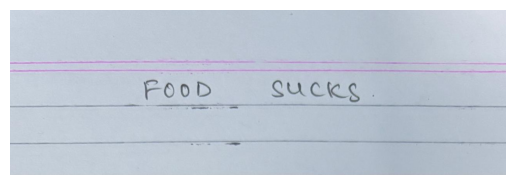

In [33]:
import matplotlib.pyplot as plt
from PIL import Image 
image=Image.open(r"C:\Users\ayush\OneDrive\Desktop\5.jpg")
#plt.plot(image)
plt.imshow(image)
plt.axis('off')